### **SupervisedLearning**
A machine learning paradigm where a model is trained using labeled data, which consists of input-output pairs. The goal is to learn the relationship between inputs (features) and outputs (labels) to make accurate predictions on unseen data. Common tasks include classification (e.g., email spam detection) and regression (e.g., predicting house prices).

### **Classification versus regression Problem**
**Classification:** Involves predicting a discrete label or category (e.g., predicting if an email is spam or not). The output is a finite set of classes, and examples include logistic regression, decision trees, and support vector machines.

**Regression:** Focuses on predicting continuous numeric values (e.g., stock prices, temperatures). The output is a range of possible values, and common algorithms include linear regression and random forest regressors.

### **Decision Tree**
A predictive modeling algorithm that uses a tree-like structure to represent decisions and their possible consequences. The tree splits the dataset into branches based on feature values, starting from the root node, with leaf nodes representing the final predictions. Decision trees are versatile, handling both classification (categorical outputs) and regression (continuous outputs) tasks.

### **Entropy:**
A measure of the uncertainty or impurity in a dataset. In decision trees, entropy is used to evaluate the quality of splits, with lower entropy indicating more homogeneity in the data subsets.

### **Information Gain:**
The improvement in purity or reduction in entropy achieved after a dataset is split on a feature. It is calculated as the difference between the entropy of the parent node and the weighted sum of the entropies of the child nodes. Features with the highest information gain are selected for splits in decision tree construction.



### $ Entropy = \sum_{i}\;-P_{i}log_{2}P_{i} $    ,   $\;\;\;\;\;\;$ $ where  P_{i} \; is \;  the \; probability\; of\; class \;i$

### Information Gain = Entropy(Parent) - [average entropy (children)]

### **Node selection based on Information Gain**
In decision trees, the node selection process involves choosing the feature that provides the highest information gain for splitting the data. Information gain measures the reduction in uncertainty (entropy) after a split. The feature with the maximum information gain is selected at each step, as it results in the most homogenous child nodes. This iterative process continues until a stopping criterion is met, such as reaching a maximum tree depth or having all data in a node belonging to the same class.

### **Overfitting:**
Overfitting occurs when a machine learning model learns the training data too well, including its noise and outliers. As a result, the model performs exceptionally well on the training data but poorly on unseen data, failing to generalize. Indicators of overfitting include low training error but high validation or test error

### **Underfitting:**
Underfitting happens when a model is too simplistic to capture the underlying patterns in the data. It occurs when the model fails to learn adequately from the training data, resulting in poor performance on both the training and unseen data. Indicators of underfitting include high error on both the training and test datasets.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
dbts_new = pd.read_csv('/content/imputed_data_diabetes1 (1).csv')
dbts_new.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,6,148.0,72,35.00000,125,33.6,0.627,50,1
1,1,85.0,66,29.00000,125,26.6,0.351,31,0
2,8,183.0,64,29.15342,125,23.3,0.672,32,1
3,1,89.0,66,23.00000,94,28.1,0.167,21,0
4,0,137.0,40,35.00000,168,43.1,2.288,33,1


In [12]:
from sklearn.model_selection import train_test_split
spltd_data = dbts_new.values
# separate the dataset into input and output components
X = spltd_data [:,0:8]
Y = spltd_data[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## **Now, lets apply the cleaned data into one of the learning algorithm called Decision Tree using sklearn library.**

In [13]:
from sklearn.tree import DecisionTreeClassifier
algo = DecisionTreeClassifier(criterion = "entropy",random_state = 42, max_depth = 4 , min_samples_leaf=5)  # decision tree witha depth of 4
algo.fit(X_train, Y_train)
result = algo.score(X_test, Y_test)
print(("The Decision Tree model has given Accuracy of: %.3f%%") % (result*100.0))

The Decision Tree model has given Accuracy of: 72.727%


### **Decision Tree Plot**

[Text(0.3958333333333333, 0.9, 'x[1] <= 123.5\nentropy = 0.933\nsamples = 614\nvalue = [400, 214]'),
 Text(0.125, 0.7, 'x[5] <= 26.45\nentropy = 0.662\nsamples = 355\nvalue = [294, 61]'),
 Text(0.26041666666666663, 0.8, 'True  '),
 Text(0.08333333333333333, 0.5, 'entropy = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.16666666666666666, 0.5, 'x[7] <= 28.5\nentropy = 0.783\nsamples = 262\nvalue = [201, 61]'),
 Text(0.08333333333333333, 0.3, 'x[5] <= 32.35\nentropy = 0.484\nsamples = 143\nvalue = [128, 15]'),
 Text(0.041666666666666664, 0.1, 'entropy = 0.121\nsamples = 61\nvalue = [60, 1]'),
 Text(0.125, 0.1, 'entropy = 0.659\nsamples = 82\nvalue = [68.0, 14.0]'),
 Text(0.25, 0.3, 'x[1] <= 94.5\nentropy = 0.963\nsamples = 119\nvalue = [73, 46]'),
 Text(0.20833333333333334, 0.1, 'entropy = 0.362\nsamples = 29\nvalue = [27, 2]'),
 Text(0.2916666666666667, 0.1, 'entropy = 1.0\nsamples = 90\nvalue = [46, 44]'),
 Text(0.6666666666666666, 0.7, 'x[5] <= 29.95\nentropy = 0.976\nsamples = 259\nva

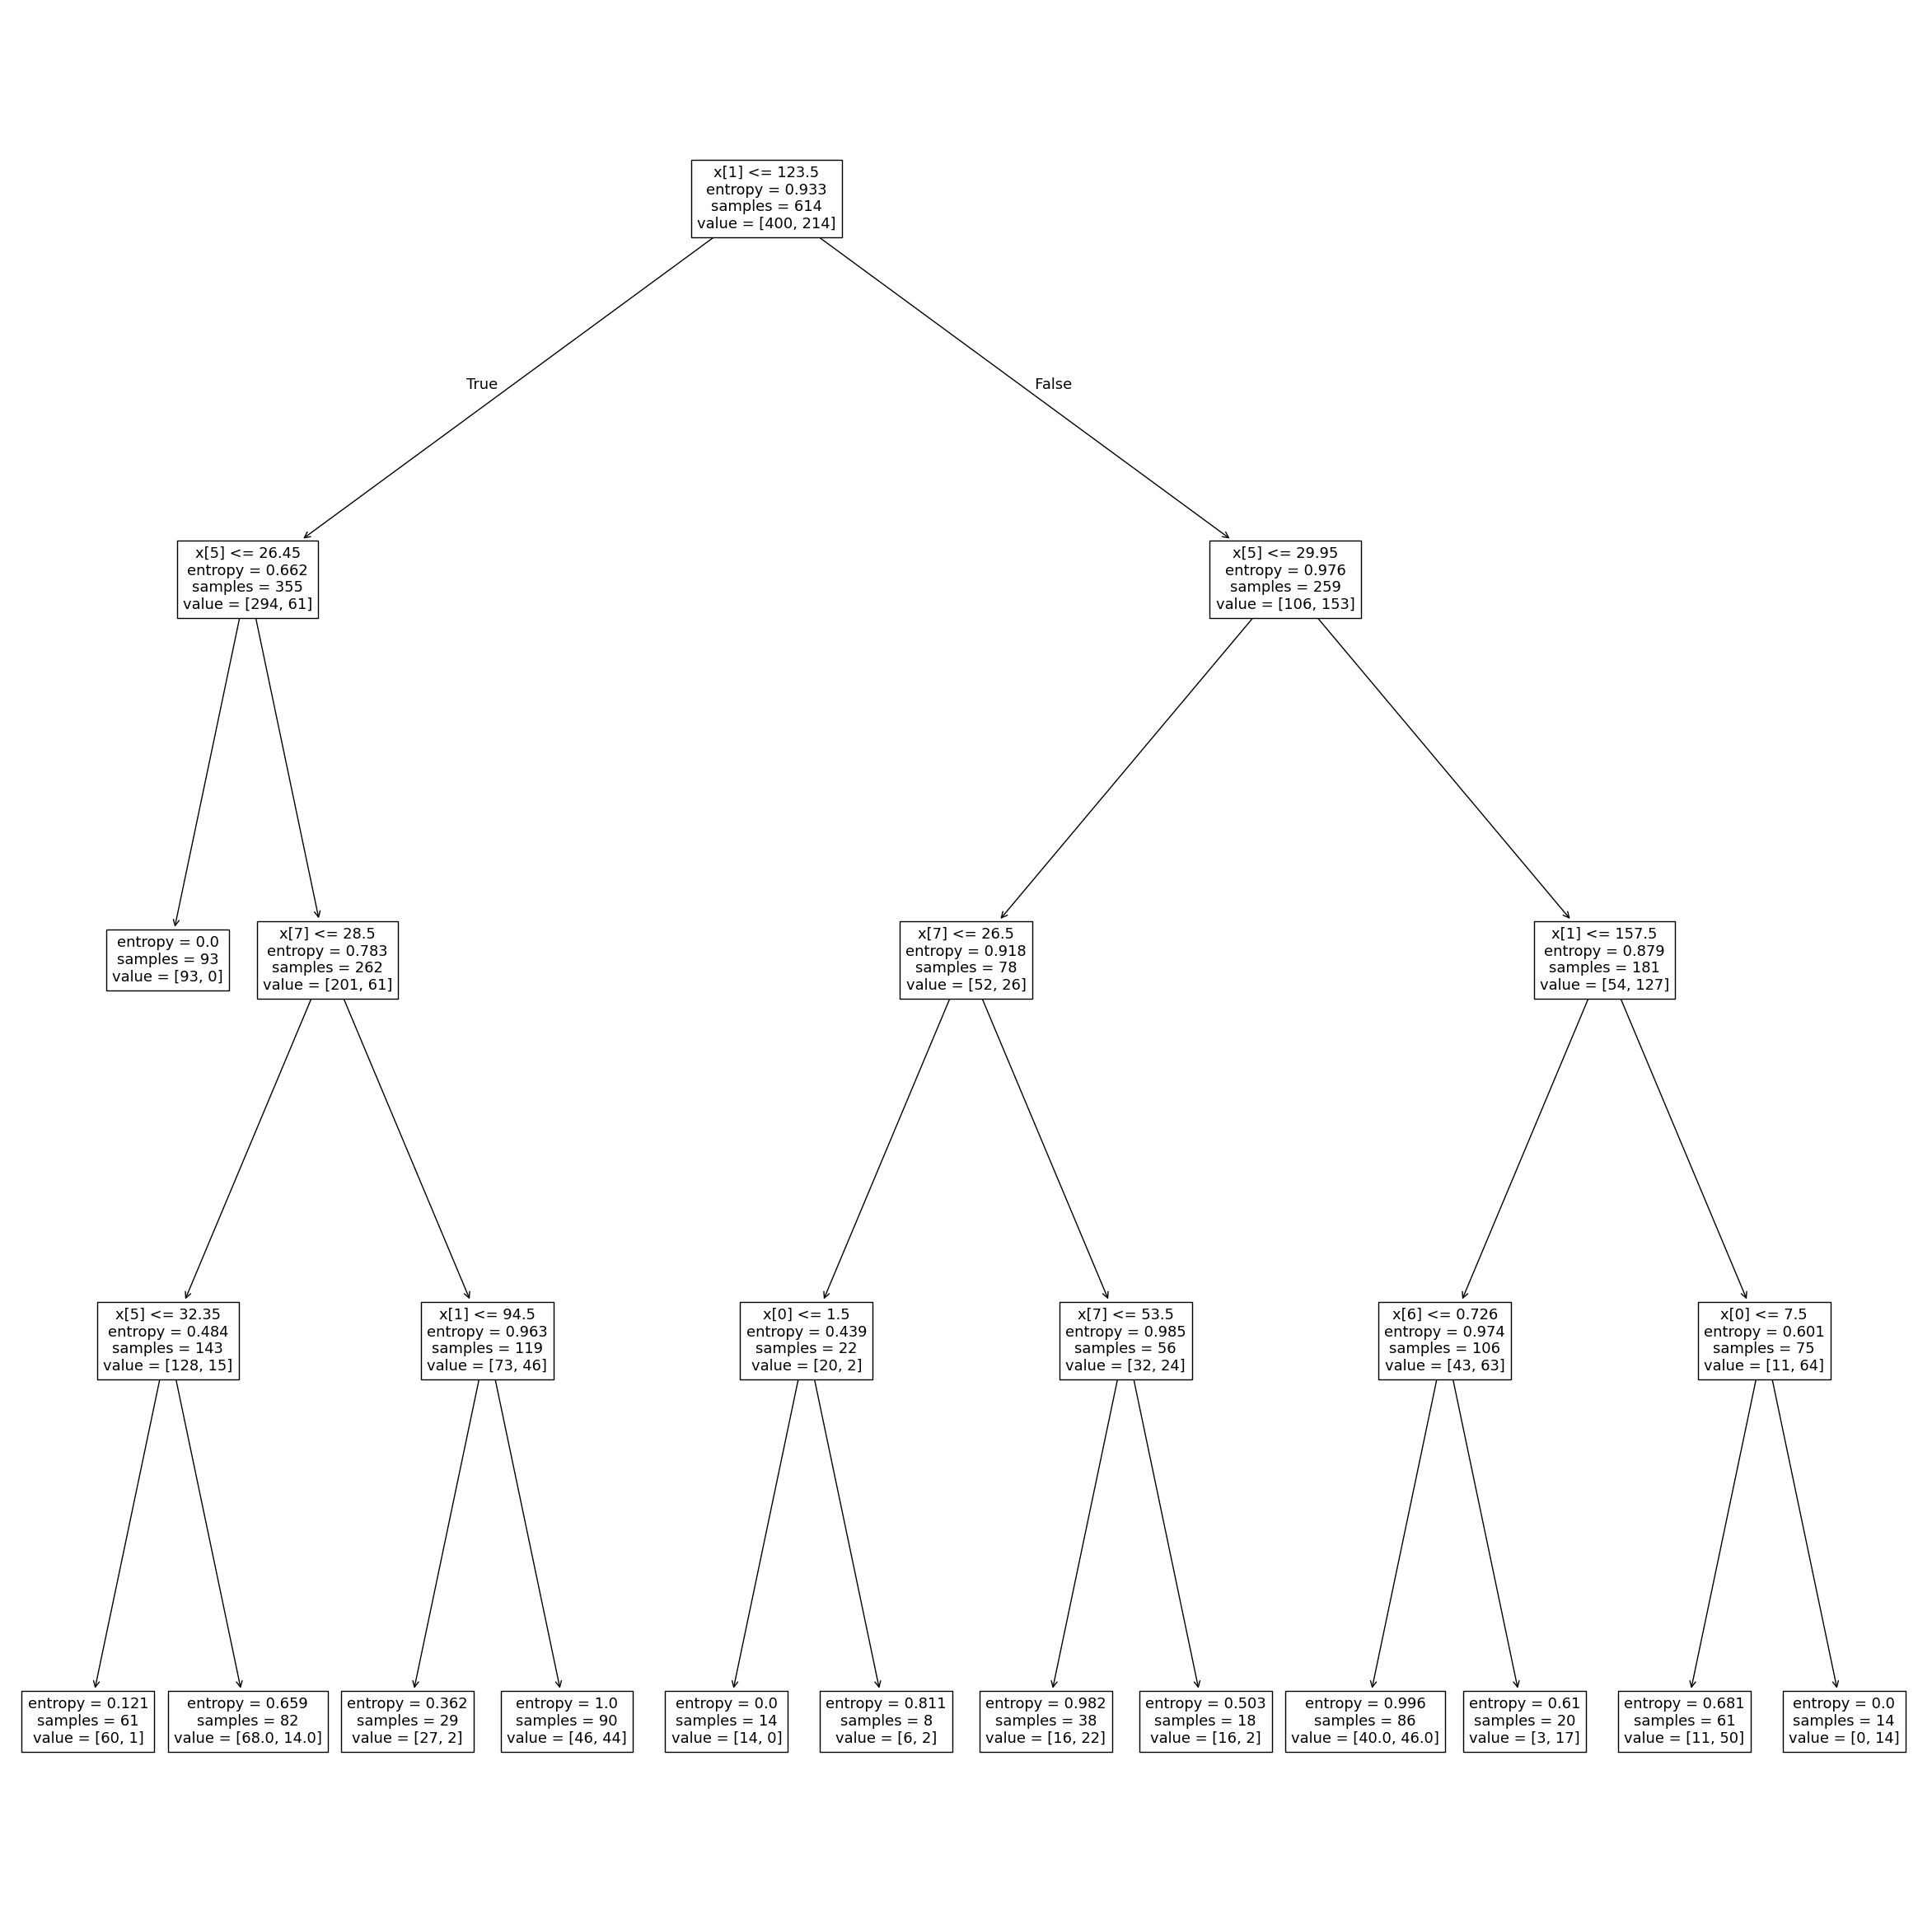

In [14]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(algo)

## **Performance Metrics of learning algorithm**
Performance metrics are used to evaluate how well a learning algorithm performs in predicting outcomes. These metrics help assess the accuracy, precision, recall, and other aspects of a model's predictions, enabling a comparison of different models and tuning them for better results.

### **Evaluate the predictive accuracy of a model**
Predictive accuracy measures how often the model makes correct predictions.


### **Create Confusion Matrix to compare the number of predicted values against actual labeled value**

In [15]:
Y_Prdct = algo.predict(X_test)
print(Y_Prdct)

[0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]


In [16]:
from sklearn import metrics
cf_mtrx = metrics.confusion_matrix(Y_test, Y_Prdct)
cf_mtrx

array([[78, 22],
       [20, 34]])

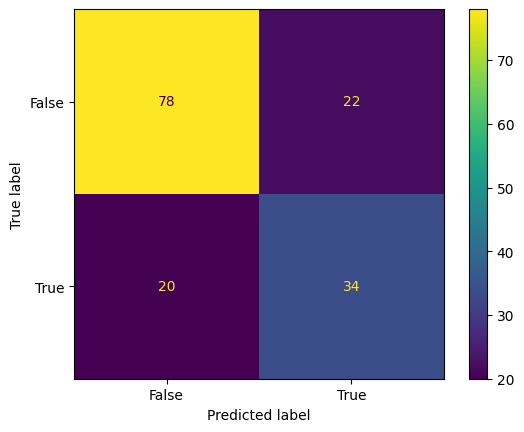

In [17]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_mtrx, display_labels = [ False,True]) #[False, True])
cm_display.plot()
plt.show()

### **Data Interpretation of Confusion Matrix**
****
 <b>True negative (TN) and positive (TP) --> Of the total test dataset the decision tree model predicted 67 data rows as true negative and 45 data rows as true postive which means the actual labels matched the predicted labelsfor real diabetic and no diabetic labels.</b>
****
<b>False Positive --> Actually the sample Daibetic label is false/non-diabetic but the model predicts the sample as true or diabetic. So for the 35 non diabetic samples the model predicted all of them as diabetic which isnt the case.  </b>
****
<b>False Negative --> Actually the sample Daibetic label is true/diabetic but the model predicts the sample as fasle or non- diabetic. So for the 7 diabetic samples the model predicted all of them as non-diabetic which isnt the case.
</b>

### **Accuracy= Number of correctly classified objects / Number of classified objects**

#### $ i.e Accuracy  =   (TP + TN)\; /\; (TP + TN + FP +  FN)$

#### Evaluate separately for each class C

#### $ Precision (p)= (TP )\; /\; (TP + FP)$

#### $ Recall (r) = (TP )\; /\; (TP + FN)$

### Maximize
#### $ F-measure (F) =  2rp \;/ \;(r+p)$

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_Prdct))

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       100
         1.0       0.61      0.63      0.62        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

